In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import numpy as np
import pandas as pd
import mylib as lib

data = lib.readcsv('data\ind30_m_vw_rets.csv')
#data.head()
data.columns = data.columns.str.strip()
#data.columns

In [28]:
history_return = lib.annualized_return(data["1996":"2000"])
cov = data["1996":"2000"].cov()

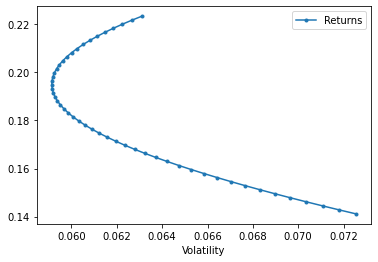

In [57]:
assets = ["Fin", "Beer"]
lib.potfolio_frontier_2(50, history_return[assets], cov.loc[assets,assets])

In [58]:
from scipy.optimize import minimize

asset_number = history_return[assets].shape[0]
init_guess = np.repeat(1/asset_number, asset_number)
bounds = ((0.0, 1.0),)*asset_number
target_return = 0.19
covariance = cov.loc[assets,assets]
hisret = history_return[assets]
return_constraint = {"type": "eq", 
                    "args": (hisret,),
                    "fun": lambda weight, hisret: lib.portfolio_ret(weight, hisret) - target_return}
weightsum_constraint = {"type": "eq",
                    "fun": lambda weights: np.sum(weights) - 1}

result = minimize(lib.portfolio_vol, init_guess, method="SLSQP",
    args=(covariance,),
    constraints=(return_constraint, weightsum_constraint),
    bounds = bounds)
result.x

array([0.59424679, 0.40575321])

In [59]:
lib.portfolio_vol(result.x, covariance)

0.05926581085532812

In [60]:
lib.portfolio_ret(result.x, hisret)

0.18999999998482933

In [56]:
weight = lib.minimize_vol(0.15, hisret, covariance)
weight

array([0.47287631, 0.52712369])

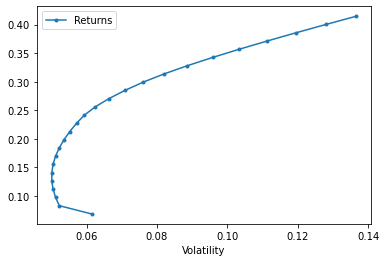

In [62]:
test_asset = ["Smoke", "Fin", "Games", "Coal"]
lib.potfolio_frontier_n(25, history_return[test_asset], cov.loc[test_asset,test_asset])